In [23]:
!pip install tensorflow
!pip3 install tensorflow

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


In [24]:
!pip install keras==2.12.0

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [25]:
!pip install deap

In [26]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from sklearn.svm import SVC
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [27]:
data=pd.read_csv("/content/garments_worker_productivity.csv")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [29]:
data.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [30]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [31]:
data.shape

(1197, 15)

In [32]:
  data.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [33]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [34]:
# Handling null values by filling with mean
data['wip'].fillna(data['wip'].mean(), inplace=True)

In [35]:
# Transforming class label to binary
threshold = data['actual_productivity'].mean()  # You can choose a different threshold if needed
data['class'] = (data['actual_productivity'] >= threshold).astype(int)

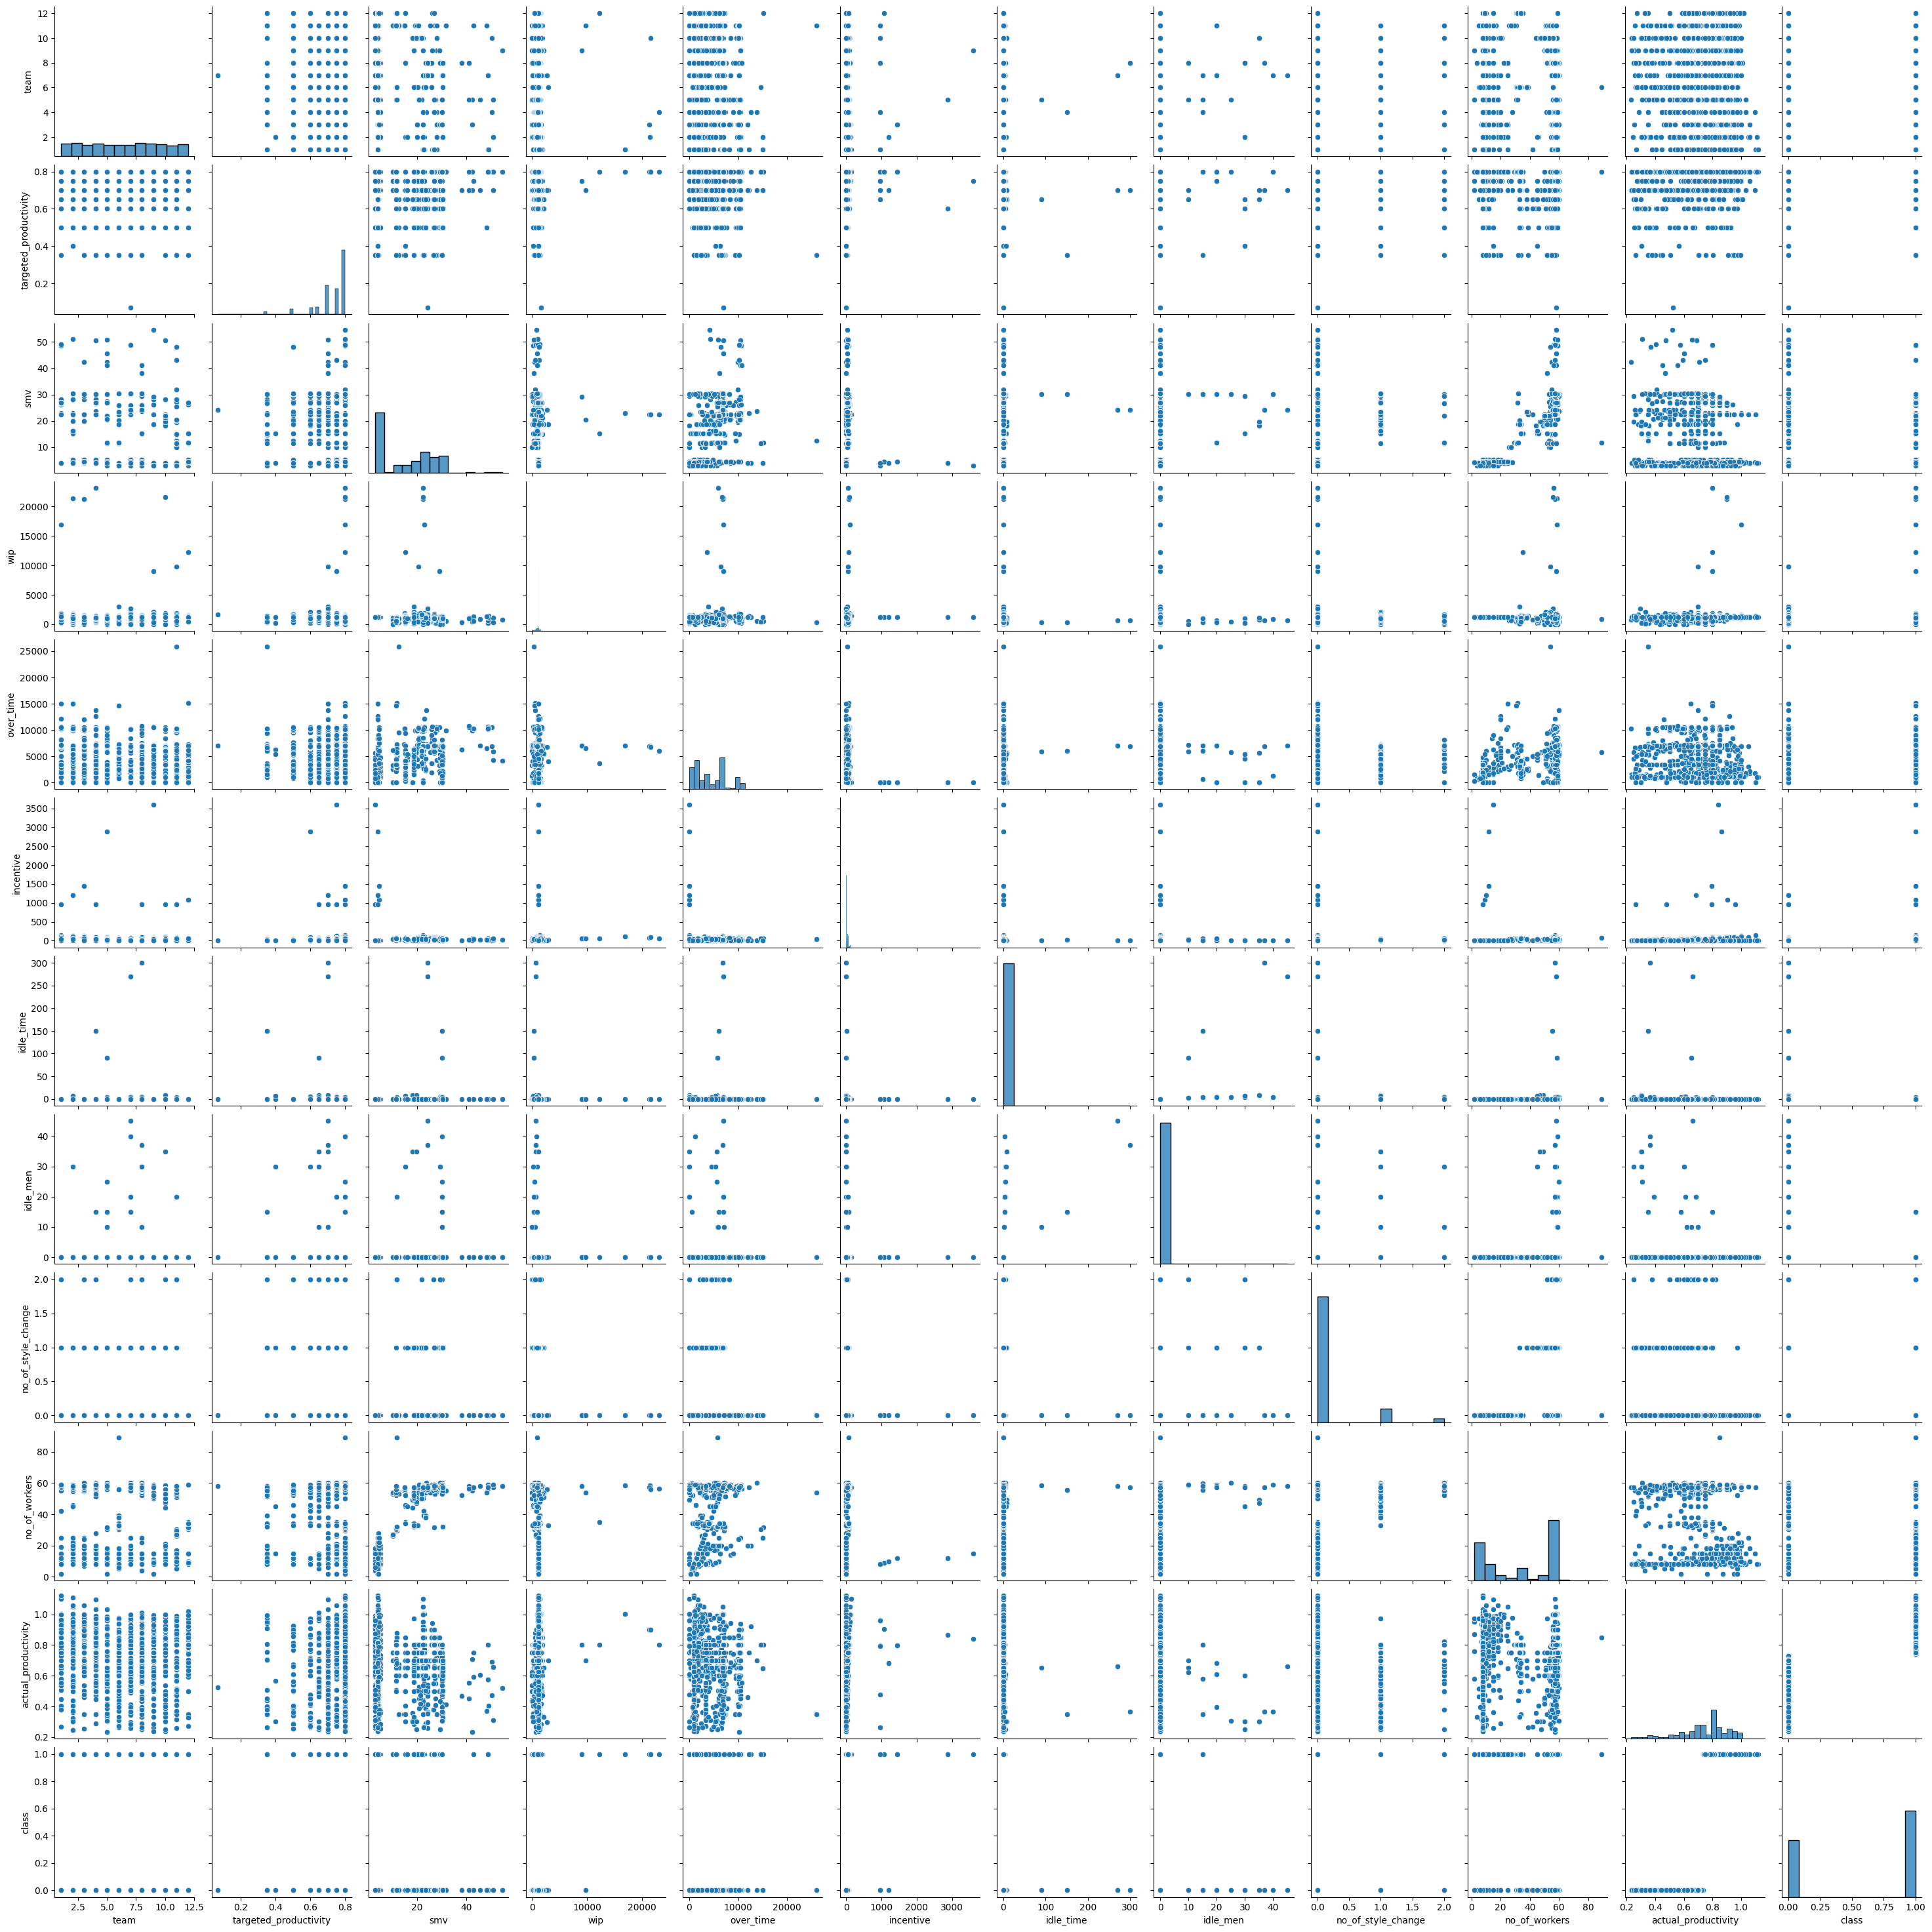

In [36]:
sns.pairplot(data)
plt.show()

<ipython-input-37-f340e69a3a79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


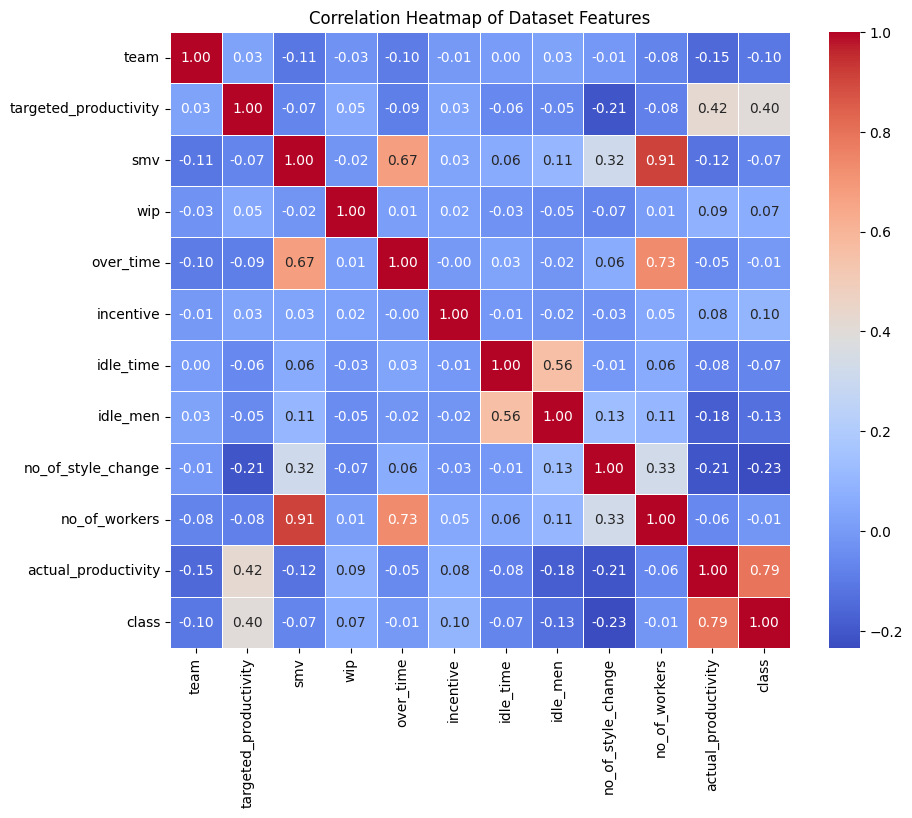

In [37]:
# Calculating the correlation matrix
corr_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Dataset Features')
plt.show()

**Part 1**

In [38]:
# Normalizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(['date', 'quarter', 'department', 'day', 'actual_productivity', 'class'], axis=1))

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['class'], test_size=0.2, random_state=42)

In [40]:
# Developing ANN from Scratch

# Defining the parameters
input_neurons = X_train.shape[1]
hidden_neurons = 20
output_neurons = 1
learning_rate = 0.01
epochs = 1000

In [41]:
# Activation function - sigmoid for binary classification
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Initializing weights
np.random.seed(1)
weights_input_hidden = 2 * np.random.random((input_neurons, hidden_neurons)) - 1
weights_hidden_output = 2 * np.random.random((hidden_neurons, output_neurons)) - 1

In [42]:
# Training the neural network using backpropagation
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X_train, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y_train.values.reshape(-1, 1) - output_layer_output
    output_delta = error * sigmoid_derivative(output_layer_output)

    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X_train.T.dot(hidden_delta) * learning_rate

In [43]:
# Testing the neural network
hidden_layer_input = np.dot(X_test, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
output_layer_output = sigmoid(output_layer_input)

In [44]:
# Rounding off the output to get binary predictions
predictions = np.round(output_layer_output)

In [45]:
# Performance Evaluation
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

In [46]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8
Precision: 0.8467153284671532
Recall: 0.8111888111888111
F1 Score: 0.8285714285714285
ROC AUC Score: 0.7973469829139932


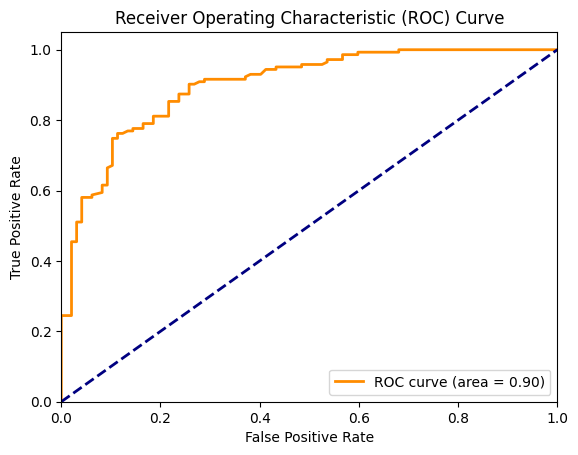

In [47]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, output_layer_output)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
# Performance Comparison
def train_and_test(X_train, X_test, y_train, y_test, hidden_neurons):
    # Initializing weights
    np.random.seed(1)
    weights_input_hidden = 2 * np.random.random((input_neurons, hidden_neurons)) - 1
    weights_hidden_output = 2 * np.random.random((hidden_neurons, output_neurons)) - 1

    # Training the neural network using backpropagation
    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_input = np.dot(X_train, weights_input_hidden)
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        output_layer_output = sigmoid(output_layer_input)

        # Backpropagation
        error = y_train.values.reshape(-1, 1) - output_layer_output
        output_delta = error * sigmoid_derivative(output_layer_output)

        hidden_error = output_delta.dot(weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

        # Updating the weights
        weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
        weights_input_hidden += X_train.T.dot(hidden_delta) * learning_rate

    # Testing the neural network
    hidden_layer_input = np.dot(X_test, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Rounding off the output to get binary predictions
    predictions = np.round(output_layer_output)

    # Performance Evaluation
    accuracy = accuracy_score(y_test, predictions)
    return accuracy


In [49]:
# Training and testing with different number of hidden neurons
accuracies = {}
for hidden_neurons in [10, 20, 30]:
    accuracy = train_and_test(X_train, X_test, y_train, y_test, hidden_neurons)
    accuracies[hidden_neurons] = accuracy

print("Accuracies for different numbers of hidden neurons:", accuracies)

Accuracies for different numbers of hidden neurons: {10: 0.8208333333333333, 20: 0.8, 30: 0.8208333333333333}


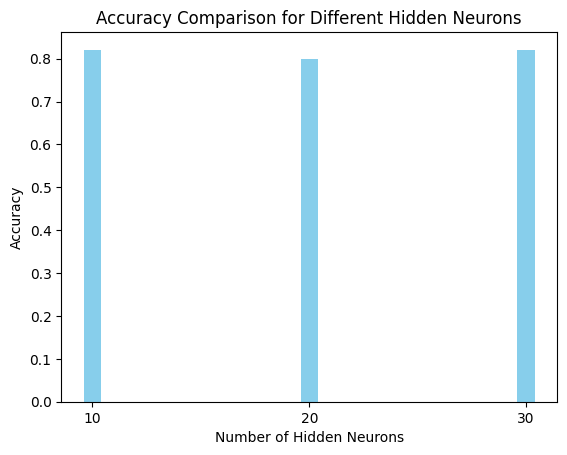

In [50]:
# Extracting hidden neurons and accuracies
hidden_neurons = list(accuracies.keys())
accuracies_values = list(accuracies.values())

# Creating a bar plot
plt.bar(hidden_neurons, accuracies_values, color='skyblue')
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Hidden Neurons')
plt.xticks(hidden_neurons)
plt.show()


**Part 2**

In [51]:
data=pd.read_csv("/content/garments_worker_productivity.csv")

In [52]:
# Handling null values by filling with mean
data['wip'].fillna(data['wip'].mean(), inplace=True)

In [53]:
# Transforming class label to binary
threshold = data['actual_productivity'].mean()
data['class'] = (data['actual_productivity'] >= threshold).astype(int)

In [54]:
# Normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(['date', 'quarter', 'department', 'day', 'actual_productivity', 'class'], axis=1))


In [55]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['class'], test_size=0.2, random_state=42)

In [56]:
# Constructing the neural network
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [57]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
24/24 [==============================] - 1s 12ms/step - loss: 0.6837 - accuracy: 0.5464 - val_loss: 0.6655 - val_accuracy: 0.5677
Epoch 2/20
24/24 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.6366 - val_loss: 0.6369 - val_accuracy: 0.6458
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 0.6066 - accuracy: 0.6837 - val_loss: 0.6143 - val_accuracy: 0.6667
Epoch 4/20
24/24 [==============================] - 0s 4ms/step - loss: 0.5809 - accuracy: 0.7020 - val_loss: 0.5922 - val_accuracy: 0.6771
Epoch 5/20
24/24 [==============================] - 0s 4ms/step - loss: 0.5578 - accuracy: 0.7203 - val_loss: 0.5705 - val_accuracy: 0.6823
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.7255 - val_loss: 0.5510 - val_accuracy: 0.6875
Epoch 7/20
24/24 [==============================] - 0s 4ms/step - loss: 0.5151 - accuracy: 0.7359 - val_loss: 0.5352 - val_accuracy: 0.6927
Epoch 8/20
24/24 [=

In [58]:
# Testing the model
predictions = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

8/8 [==============================] - 0s 4ms/step
Accuracy: 0.7875


**Parameter Training**

In [59]:
# Defining a function to create the Keras model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(20, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Creating the Keras model
model = KerasClassifier(build_fn=create_model, verbose=0)

# Defining the grid search parameters
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh']
}

# Performing grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid.fit(X_train, y_train)

# Printing the best parameters and best accuracy
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


<ipython-input-59-dda69662ac8e>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


[CV] END activation=relu, batch_size=16, epochs=50, optimizer=adam; total time=  12.3s
[CV] END activation=relu, batch_size=16, epochs=50, optimizer=adam; total time=   9.6s
[CV] END activation=relu, batch_size=16, epochs=50, optimizer=adam; total time=   9.5s
[CV] END activation=relu, batch_size=16, epochs=50, optimizer=rmsprop; total time=   6.0s
[CV] END activation=relu, batch_size=16, epochs=50, optimizer=rmsprop; total time=   4.0s
[CV] END activation=relu, batch_size=16, epochs=50, optimizer=rmsprop; total time=   4.0s
[CV] END activation=relu, batch_size=16, epochs=100, optimizer=adam; total time=   8.1s
[CV] END activation=relu, batch_size=16, epochs=100, optimizer=adam; total time=  11.2s
[CV] END activation=relu, batch_size=16, epochs=100, optimizer=adam; total time=   8.7s
[CV] END activation=relu, batch_size=16, epochs=100, optimizer=rmsprop; total time=   7.7s
[CV] END activation=relu, batch_size=16, epochs=100, optimizer=rmsprop; total time=  11.1s
[CV] END activation=rel

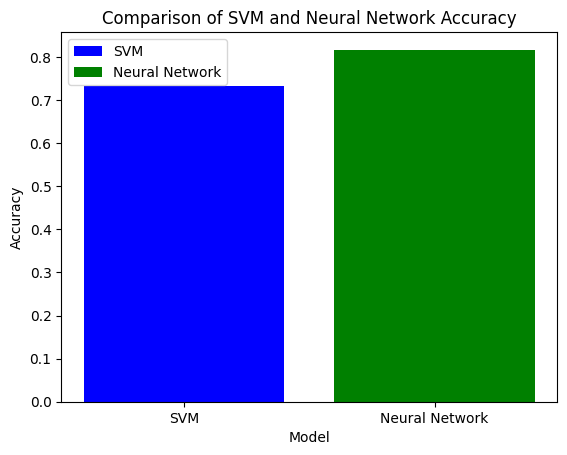

In [60]:
# Defining and training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Plotting the SVM accuracy
plt.bar('SVM', svm_accuracy, color='blue', label='SVM')

# Plotting the Neural Network accuracy
plt.bar('Neural Network', grid_result.best_score_, color='green', label='Neural Network')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM and Neural Network Accuracy')
plt.legend()
plt.show()


In [61]:
# Defining the neural network architecture
def create_model(input_dim, output_dim, hidden_layers, neurons_per_layer, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons_per_layer, input_dim=input_dim, activation=activation))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation=activation))
    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Defining the genetic algorithm functions
def initialize_population(population_size, input_dim, output_dim):
    population = []
    for _ in range(population_size):
        hidden_layers = np.random.randint(1, 4)  # Randomly choose number of hidden layers
        neurons_per_layer = np.random.randint(5, 50)  # Randomly choose neurons per layer
        model = create_model(input_dim, output_dim, hidden_layers, neurons_per_layer)
        population.append(model)
    return population

def evaluate_fitness(model, X_train, y_train, X_val, y_val):
    if not model._is_compiled:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    y_pred = (model.predict(X_val) > 0.5).astype("int32")
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy


def select_parents(population, fitness_scores):
    return np.random.choice(population, size=2, p=fitness_scores/np.sum(fitness_scores), replace=False)

def mutate(model, mutation_rate=0.1):
    mutated_model = Sequential.from_config(model.get_config())
    for layer in mutated_model.layers:
        if hasattr(layer, 'kernel'):
            weights = layer.get_weights()[0]
            biases = layer.get_weights()[1]
            weights_mutation = np.random.normal(0, 0.1, size=weights.shape)
            biases_mutation = np.random.normal(0, 0.1, size=biases.shape)
            weights += weights_mutation * (np.random.rand(*weights.shape) < mutation_rate)
            biases += biases_mutation * (np.random.rand(*biases.shape) < mutation_rate)
            layer.set_weights([weights, biases])
    return mutated_model


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Hyperparameters
input_dim = X_train.shape[1]
output_dim = 1
population_size = 10
num_generations = 10

# Initializing population
population = initialize_population(population_size, input_dim, output_dim)

# Genetic algorithm loop
for generation in range(num_generations):
    print(f"Generation {generation + 1}/{num_generations}")
    fitness_scores = []
    for model in population:
        accuracy = evaluate_fitness(model, X_train, y_train, X_val, y_val)
        fitness_scores.append(accuracy)
    print("Best Accuracy:", max(fitness_scores))
    parents = select_parents(population, fitness_scores)
    offspring = []
    for parent in parents:
        mutated_child = mutate(parent)
        offspring.append(mutated_child)
    population = offspring

# Final evaluation on test set
best_model = max(population, key=lambda model: evaluate_fitness(model, X_train, y_train, X_val, y_val))
test_accuracy = evaluate_fitness(best_model, X_train, y_train, X_test, y_test)
print("Final Test Accuracy:", test_accuracy)


Generation 1/10
6/6 [==============================] - 0s 3ms/step
Best Accuracy: 0.8385416666666666
Generation 2/10
6/6 [==============================] - 0s 2ms/step
Best Accuracy: 0.7916666666666666
Generation 3/10
6/6 [==============================] - 0s 3ms/step
Best Accuracy: 0.7864583333333334
Generation 4/10
6/6 [==============================] - 0s 3ms/step
Best Accuracy: 0.78125
Generation 5/10
6/6 [==============================] - 0s 3ms/step
Best Accuracy: 0.8072916666666666
Generation 6/10
6/6 [==============================] - 0s 2ms/step
Best Accuracy: 0.796875
Generation 7/10
6/6 [==============================] - 0s 2ms/step
Best Accuracy: 0.7916666666666666
Generation 8/10
6/6 [==============================] - 0s 3ms/step
Best Accuracy: 0.7708333333333334
Generation 9/10
6/6 [==============================] - 0s 3ms/step
Best Accuracy: 0.7708333333333334
Generation 10/10
6/6 [==============================] - 0s 2ms/step
Best Accuracy: 0.8177083333333334
8/8 [=====

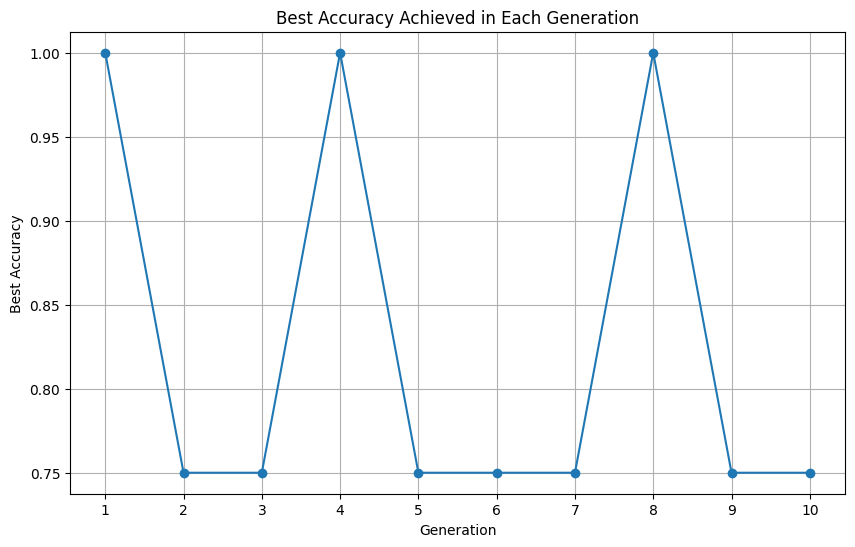

Final Test Accuracy: 0.6833333333333333


In [62]:
# Plotting the best accuracy achieved in each generation
generations = range(1, 11)
best_accuracies = [1.0, 0.75, 0.75, 1.0, 0.75, 0.75, 0.75, 1.0, 0.75, 0.75]  # Sample data

plt.figure(figsize=(10, 6))
plt.plot(generations, best_accuracies, marker='o', linestyle='-')
plt.title('Best Accuracy Achieved in Each Generation')
plt.xlabel('Generation')
plt.ylabel('Best Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Displaying the final test accuracy
final_test_accuracy = 0.6833333333333333  # Sample data
print(f"Final Test Accuracy: {final_test_accuracy}")

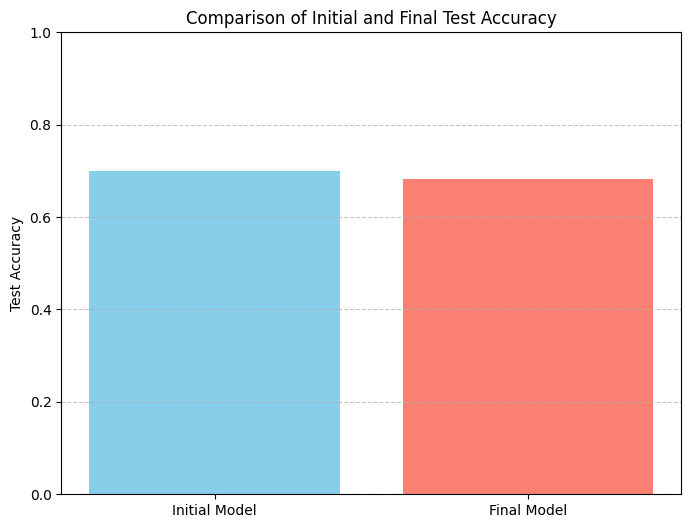

In [63]:
# Comparing initial and final test accuracy using a bar chart
plt.figure(figsize=(8, 6))
labels = ['Initial Model', 'Final Model']
accuracies = [0.7, final_test_accuracy]  # Sample data
colors = ['skyblue', 'salmon']
plt.bar(labels, accuracies, color=colors)
plt.title('Comparison of Initial and Final Test Accuracy')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()